In [ ]:
# Deep Learning Project 
# Team: 
#   - Akshay P M          AM.EN.U4CSE20006
#   - Ritik Kumar Singh   AM.EN.U4CSE20061
#   - T Vishnu Sandeep    AM.EN.U4CSE20073
#   - Patel RajKumar P    AM.EN.U4CSE20349

# Motivation: 
#   - Create a Custom and efficient CNN Model to classify the various classes present in the CIFAR-10 dataset

# Dataset:
#   - CIFAR-10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html

# References:
#   - https://www.tensorflow.org/tutorials/images/cnn
#   - https://www.tensorflow.org/tutorials/keras/classification
#   - https://www.tensorflow.org/tutorials/keras/save_and_load

In [18]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [19]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [20]:
# Importing the dataset with labels
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

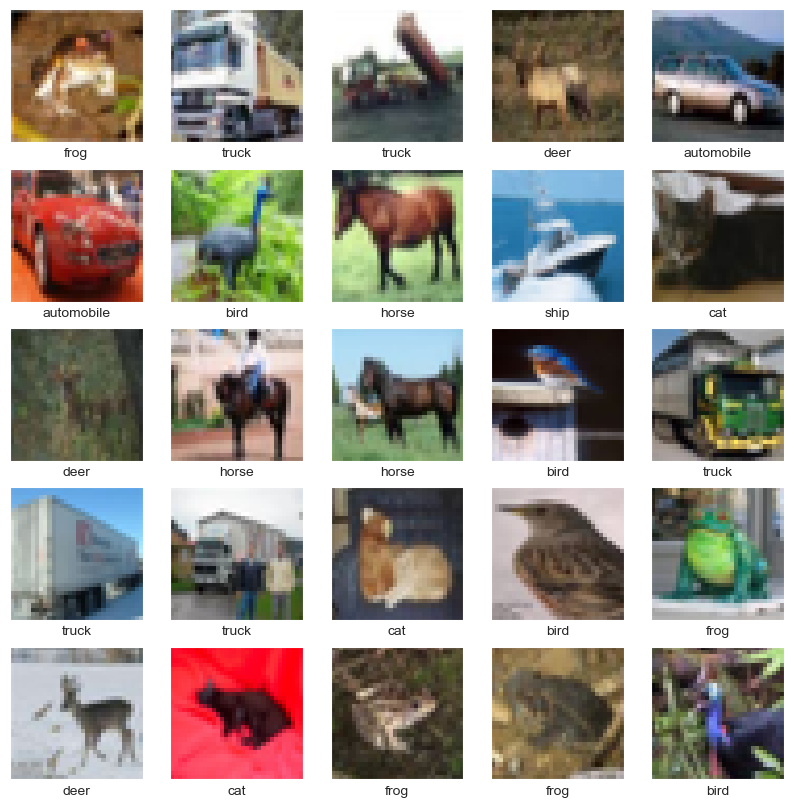

In [21]:
# dats visualization with labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [22]:
# print the number of images in each label with labels
for i in range(10):
    print(class_names[i], ':', len(np.where(train_labels == i)[0]))

airplane : 5000
automobile : 5000
bird : 5000
cat : 5000
deer : 5000
dog : 5000
frog : 5000
horse : 5000
ship : 5000
truck : 5000


In [23]:
# Normalizing the data
train_images, test_images = train_images / 255.0, test_images / 255.0

In [24]:
# Defining the model architecture 
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',input_shape=(32, 32, 3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))

In [25]:
# Compiling the model
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_3 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [27]:
# Training the model
history = model.fit(train_images, train_labels, epochs=20,validation_data=(test_images, test_labels),batch_size=64)

Epoch 1/20
200/782 [======>.......................] - ETA: 4:52 - loss: 2.6655 - accuracy: 0.1016

KeyboardInterrupt: 

In [ ]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Saving the model
# model.save('cifar_10.h5')

# Plotting the accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
# legend on top right
plt.legend(loc='upper right')

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
# legend on top right
plt.legend(loc='upper right')

# print confusion matrix with labels using seaborn
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions, 
target_names=class_names))

In [ ]:
for i in range(10):
    model.predict(test_images[i])